# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 12/28/20 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 12/28/20 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,2328,38928341,6.0
Albania,6572,2877800,228.4
Algeria,5566,43851043,12.7
Andorra,493,77265,638.1
Angola,934,32866268,2.8
Antigua and Barbuda,10,97928,10.2
Argentina,80310,45195777,177.7
Armenia,8828,2963234,297.9
Australia,289,25459700,1.1


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Lithuania,35917,2722291,1319.4
Liechtenstein,459,38137,1203.6
San Marino,293,33938,863.3
Panama,36718,4314768,851.0
Netherlands,142666,17134873,832.6
Czechia,88089,10708982,822.6
Slovenia,17046,2078932,819.9
US,2575570,329466283,781.7
Montenegro,4821,628062,767.6


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

12/24/20    1630596.0
12/25/20    1632736.0
12/26/20    1646240.0
12/27/20    1658639.0
12/28/20    1672643.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

12/15/20        NaN
12/16/20    32744.0
12/17/20    30179.0
12/18/20    32830.0
12/19/20    21679.0
12/20/20     6444.0
12/21/20    19256.0
12/22/20    36153.0
12/23/20    33758.0
12/24/20    26467.0
12/25/20     2140.0
12/26/20    13504.0
12/27/20    12399.0
12/28/20    14004.0
Name: Germany, dtype: float64

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


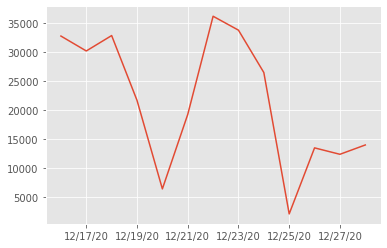

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83783945.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

336.05125659814655